In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_bank = pd.read_csv('bank-additional-full.csv',sep=";")
df_bank.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

# Data Understanding

In [3]:

df_bank.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
df_bank.describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

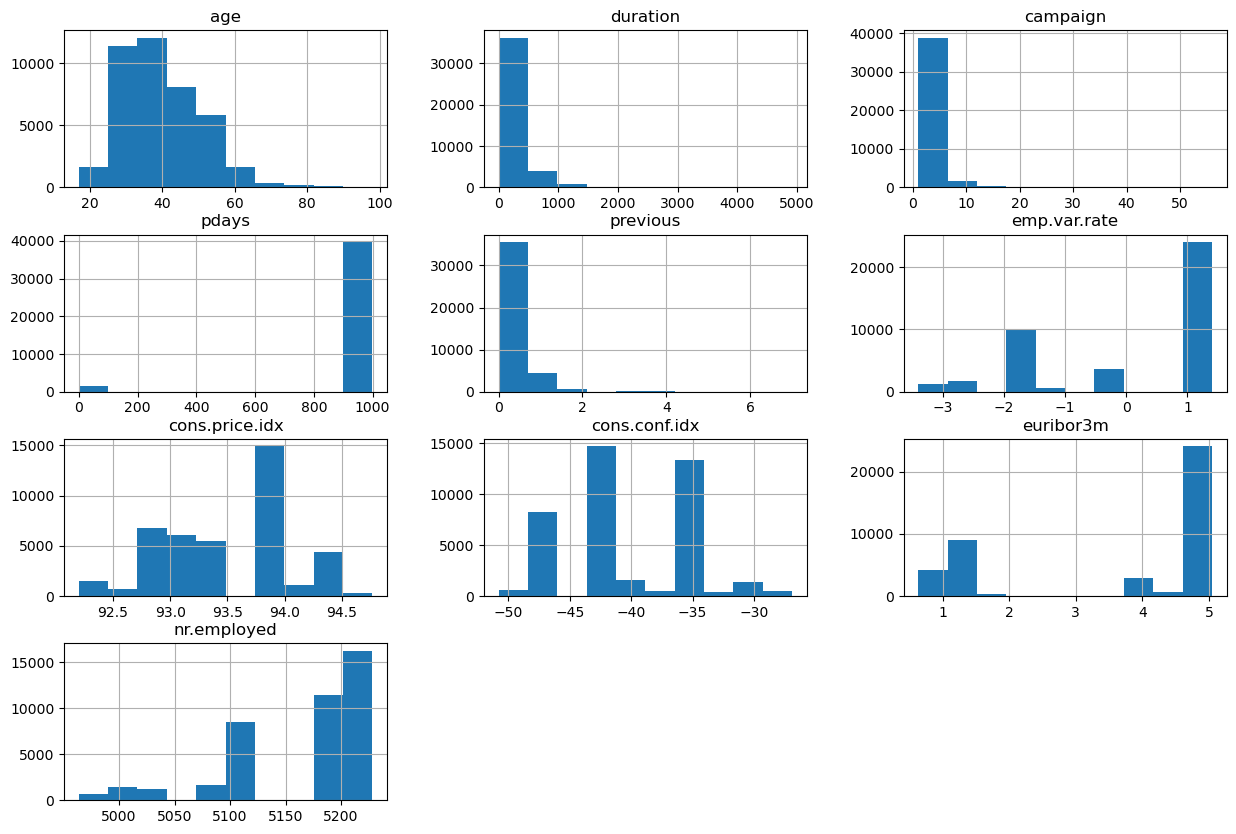

In [5]:

df_bank.hist(figsize=(15,10));

# EDA

In [6]:

# Check null value
df_bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
# duplicate check and dropping any duplicates

df_bank[df_bank.duplicated()].head()
df_bank.drop_duplicates(keep='first',inplace=True)

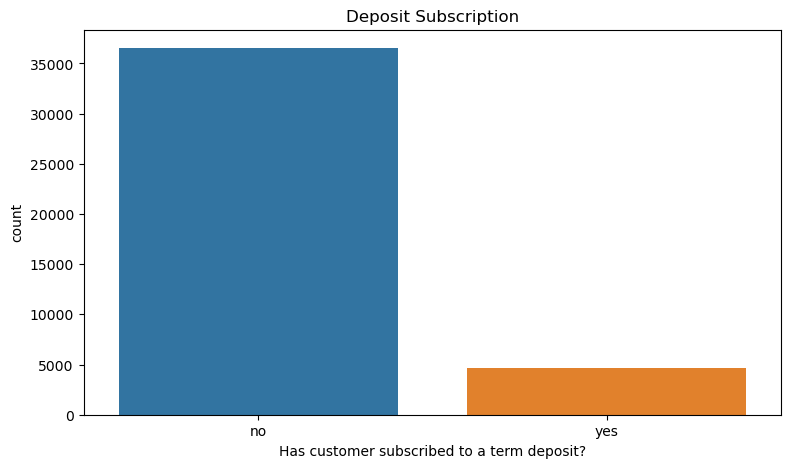

In [8]:
plt.figure(figsize=(9,5))
sns.countplot(data=df_bank, x = 'y')
plt.xlabel('Has customer subscribed to a term deposit?')
plt.title('Deposit Subscription');

There is a high chance of data imbalance, seeing as the number of 'no' is almost ~8x more than the 'yes' data. There is a risk of the data prediction to be skewed due to insufficient 'yes' data.

a. age
Age Categories:

17-29 = Young

30-43 = Middle-age Adult

44-56 = Old-age Adult

56-100 = Elderly

In [9]:

age= [17,30,43,56,100]
labels = ['Young','Middle-age Adult','Old-age Adult','Elderly']
df_bank['agegroup'] = pd.cut(df_bank['age'], bins=age, labels=labels, right=False)
df_bank

age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  pdays  previous     poutcome  \
0      telephone   may         mon  ...    999         0  nonexistent   
1      telephone   may         mon  ...    999         0  nonexistent   
2      telephone   may         mon  ...    999         0  nonexistent   
3      telephone   may         mon  ...    999         0  nonexistent   
4      telephone   may         mon  ...    999         0  nonexistent   
...          ...   ...         ...  ...    ...       ...          ...   
41183   cellular   nov         fri  ...    999         0  nonexistent   
41184   cellular   nov         fri  ...    999         0  nonexistent   
41185   cellular   nov         fri  ...    999         0  nonexistent   
41186   cellular   nov         fri  ...    999         0  nonexistent   
41187   cellular   nov         fri  ...    999         1      failure   

       emp.var.rate cons.price.idx  cons.conf.idx  euribor3m  nr.employed  \
0               1.1         93.994          -36.4      4.857       5191.0   
1               1.1         93.994          -36.4      4.857       5191.0   
2               1.1         93.994          -36.4      4.857       5191.0   
3               1.1         93.994          -36.4      4.857       5191.0   
4               1.1         93.994          -36.4      4.857       5191.0   
...             ...            ...            ...        ...          ...   
41183          -1.1         94.767          -50.8      1.028       4963.6   
41184          -1.1         94.767          -50.8      1.028       4963.6   
41185          -1.1         94.767          -50.8      1.028       4963.6   
41186          -1.1         94.767          -50.8      1.028       4963.6   
41187          -1.1         94.767          -50.8      1.028       4963.6   

         y          agegroup  
0       no           Elderly  
1       no           Elderly  
2       no  Middle-age Adult  
3       no  Middle-age Adult  
4       no           Elderly  
...    ...               ...  
41183  yes           Elderly  
41184   no     Old-age Adult  
41185   no           Elderly  
41186  yes     Old-age Adult  
41187   no           Elderly  

[41176 rows x 22 columns]

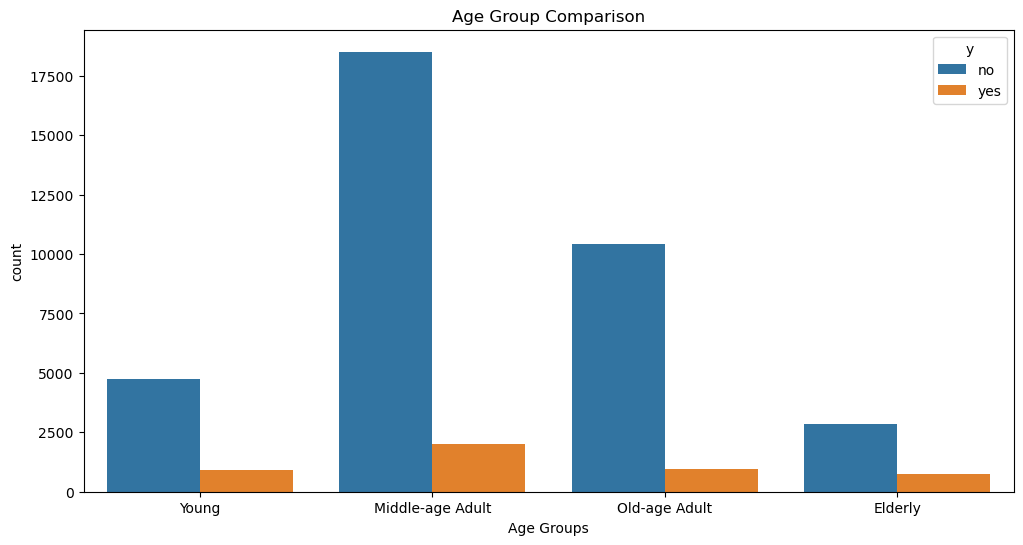

In [10]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df_bank["agegroup"],hue=df_bank["y"], data=df_bank)
plt.title('Age Group Comparison')
plt.xlabel('Age Groups')
plt.show()
     

In [11]:

age = ((pd.crosstab(index= df_bank["agegroup"], columns= df_bank["y"], normalize="index"))*100).round(2)
age.sort_values('yes', ascending=False)

y                    no    yes
agegroup                      
Elderly           79.31  20.69
Young             83.73  16.27
Middle-age Adult  90.24   9.76
Old-age Adult     91.48   8.52

From the table above, we can see that clients who are 'Elderly' or 'Young' have a higher chance of making a term deposit, with a success rate of about ~16-20%. Those who are 'Middle-aged' or 'Old-aged' have a lower chance of less than ~10% to make a term deposit with the bank.

# b. job

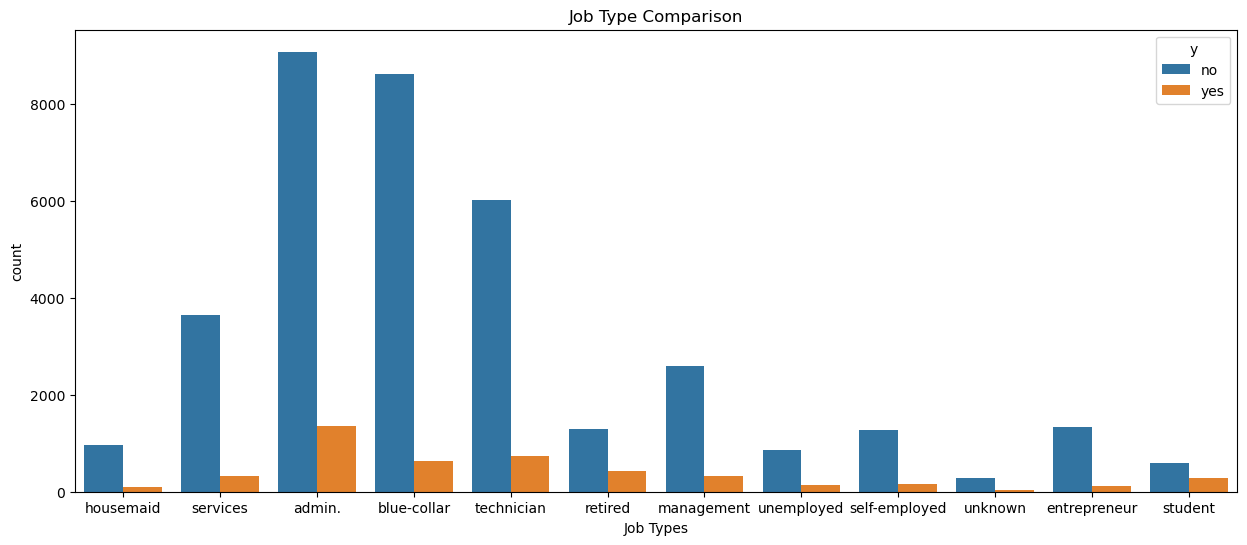

In [12]:
plt.figure(figsize=(15, 6))
sns.countplot(x=df_bank["job"],hue=df_bank["y"], data=df_bank)
plt.title('Job Type Comparison')
plt.xlabel('Job Types')
plt.show()

In [13]:
job = (pd.crosstab(index=df_bank["job"], columns= df_bank["y"], normalize= "index") *100).round(2)
job.sort_values('yes', ascending=False)

     

y                 no    yes
job                        
student        68.57  31.43
retired        74.74  25.26
unemployed     85.80  14.20
admin.         87.03  12.97
management     88.78  11.22
unknown        88.79  11.21
technician     89.17  10.83
self-employed  89.51  10.49
housemaid      90.00  10.00
entrepreneur   91.48   8.52
services       91.86   8.14
blue-collar    93.10   6.90

Clients who are 'student' or 'retired' are more likely to make a term deposit, with rates of 31.43% and 25.23% respectively. On the other hand, the least likely to make a term deposit are 'blue-collared' clients with a rate of 6.89%.

We assume that clients who are classified in 'unknown' are uncomfortable in mentioning their personal information. They are, however, still considered as potential clients as they may be clients who have never been offered any campaign before.

# C. marital

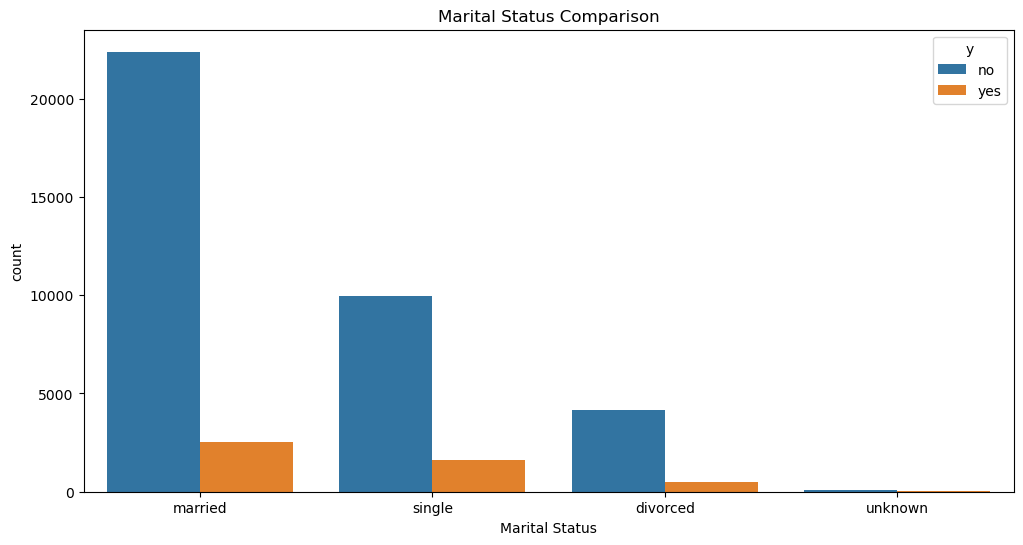

In [14]:
# C. marital

import matplotlib.pyplot as plt  
plt.figure(figsize=(12, 6))
sns.countplot(x=df_bank["marital"], hue=df_bank["y"], data=df_bank)
plt.title('Marital Status Comparison')
plt.xlabel('Marital Status')
plt.show()


In [15]:
marital = (pd.crosstab(index=df_bank["marital"], columns= df_bank["y"], normalize= "index") *100).round(2)
marital.sort_values('yes', ascending=False)

y            no    yes
marital               
unknown   85.00  15.00
single    85.99  14.01
divorced  89.68  10.32
married   89.84  10.16

The graph shows that 'married' clients have a slightly higher tendency to make a term deposit, as compared to 'single' or 'divorced' clients. We assume that clients who are classified in 'unknown' are uncomfortable in mentioning their personal information. They are, however, still considered as potential clients as they may be clients who have never been offered any campaign before.

# d. Education

We decide to combine the three categories 'basic.4y', 'basic.6y', 'basic.9y' into one group called 'Basic' for easier interpretation of data.

In [16]:
basic_grps = ['basic.4y', 'basic.6y', 'basic.9y']

df_bank['education'] = np.where(df_bank['education'].isin(basic_grps), 'Basic', df_bank['education'])
     

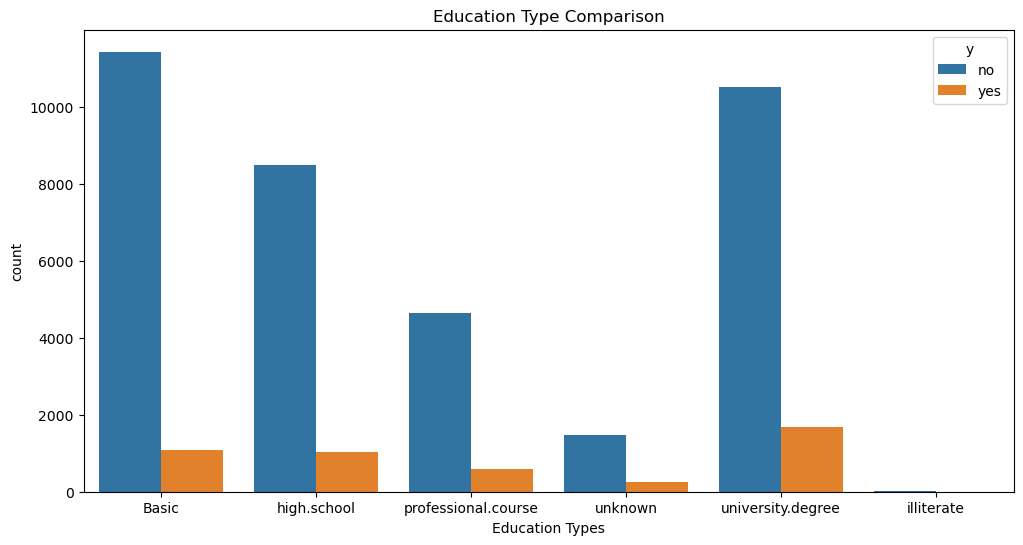

In [17]:

plt.figure(figsize=(12, 6))
sns.countplot(x=df_bank["education"],hue=df_bank["y"], data=df_bank)
plt.title('Education Type Comparison')
plt.xlabel('Education Types')
plt.show()

In [18]:
education = (pd.crosstab(index=df_bank["education"], columns= df_bank["y"], normalize= "index") *100).round(2)
education.sort_values('yes', ascending=False)

y                       no    yes
education                        
illiterate           77.78  22.22
unknown              85.49  14.51
university.degree    86.28  13.72
professional.course  88.65  11.35
high.school          89.16  10.84
Basic                91.30   8.70

Clients who are 'illiterate' seem to have the highest convertion rate of about ~22%, followed by those whose education background are unknown (14.51%). In terms of practicality in a scenario, despite having a potentially high rate of success, they may not be an effective audience for the bank to target for markerting the term deposit campaign. However, they are still kept in mind as potential audience, as mentioned with clients in 'unknown' categories.

It is more likely, perhaps towards clients with 'university degree' or 'professional course', who seem to have a relatively high convertion rate of 13.72% and 11.35% respectively, of making a term deposit with the bank as well. Clients with 'Basic' education have the least tendency to make a term deposit (8.70%).

# e. default

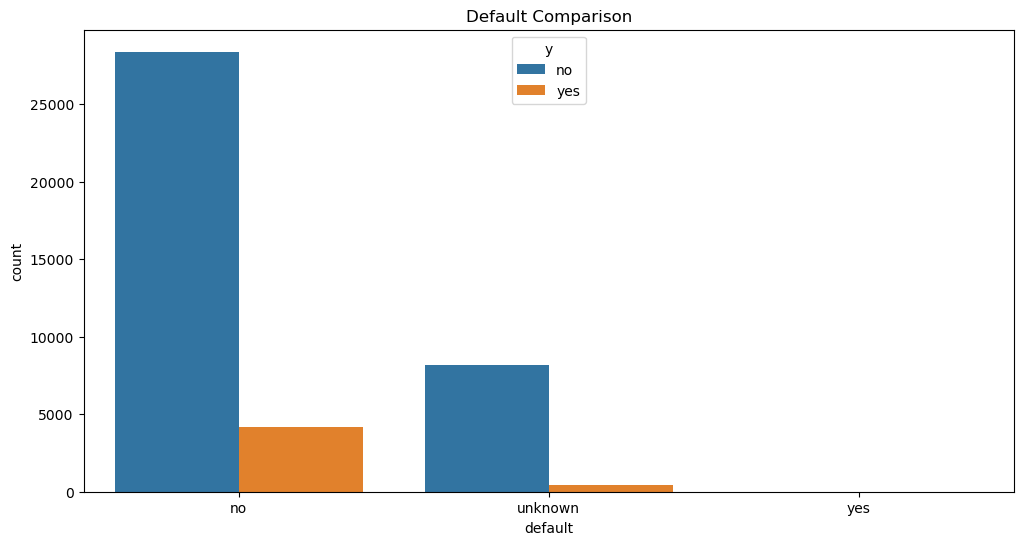

In [19]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df_bank["default"],hue=df_bank["y"], data=df_bank)
plt.title('Default Comparison')
plt.show()
     

In [20]:
df_bank['default'].value_counts()

no         32577
unknown     8596
yes            3
Name: default, dtype: int64

The value counts is done in order to determine the actual value of 'yes'. It turns out that the 'yes' section of 'default' attribute has only 3 sets of data, which is very small compared to the 'no' section that has over 30000 data, followed by 'unknown' with ~8500 data.

In [21]:
default = (pd.crosstab(index=df_bank["default"], columns= df_bank["y"], normalize= "index") *100).round(2)
default.sort_values('yes', ascending=False)

y            no    yes
default               
no        87.12  12.88
unknown   94.85   5.15
yes      100.00   0.00

The 'default' column shows whether the client has credit in their bank account or not.

Upon adding the data and reassessing the graph, we can see that there is a higher chance for clients to make a term deposit if they do not have credit in their bank accounts, with a convertion rate of ~13%. This will be a good indicator for the bank's future target audience. Moreover, there is a 100% chance of clients rejecting the marketing campaign if they have credit in their bank accounts. This will perhaps be more compelling if the amount of data is not too low.

# f. housing

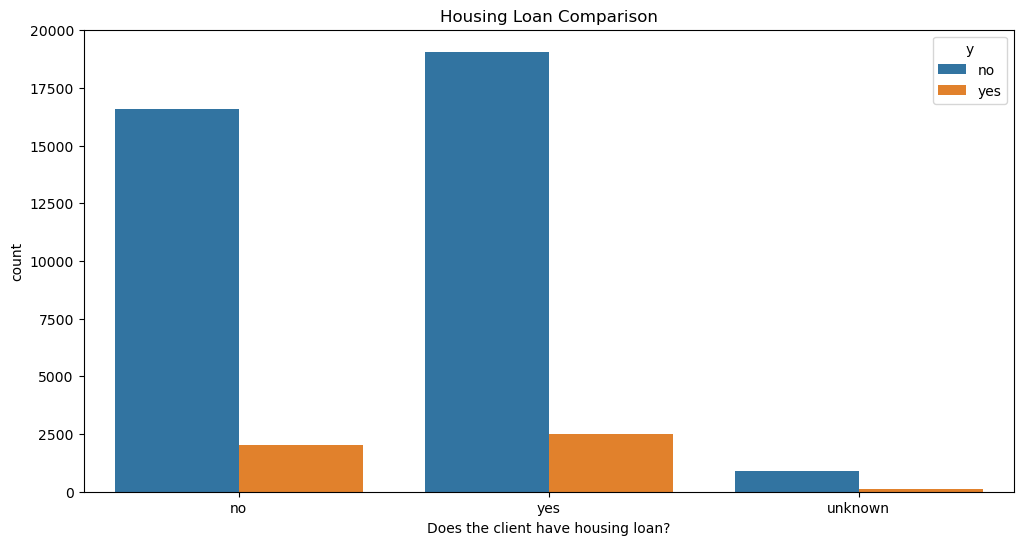

In [22]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df_bank["housing"],hue=df_bank["y"], data=df_bank)
plt.title('Housing Loan Comparison')
plt.xlabel('Does the client have housing loan?')
plt.show()


In [23]:

housing_loan = (pd.crosstab(index=df_bank["housing"], columns= df_bank["y"], normalize= "index") *100).round(2)
housing_loan.sort_values('yes', ascending=False)

y           no    yes
housing              
yes      88.38  11.62
no       89.12  10.88
unknown  89.19  10.81

There is a slightly higher chance for clients that have a housing loan to make a term deposit, with quite a similar conversion rate for those clients who do not have a housing loan and 'unknown' data.

# g. loan

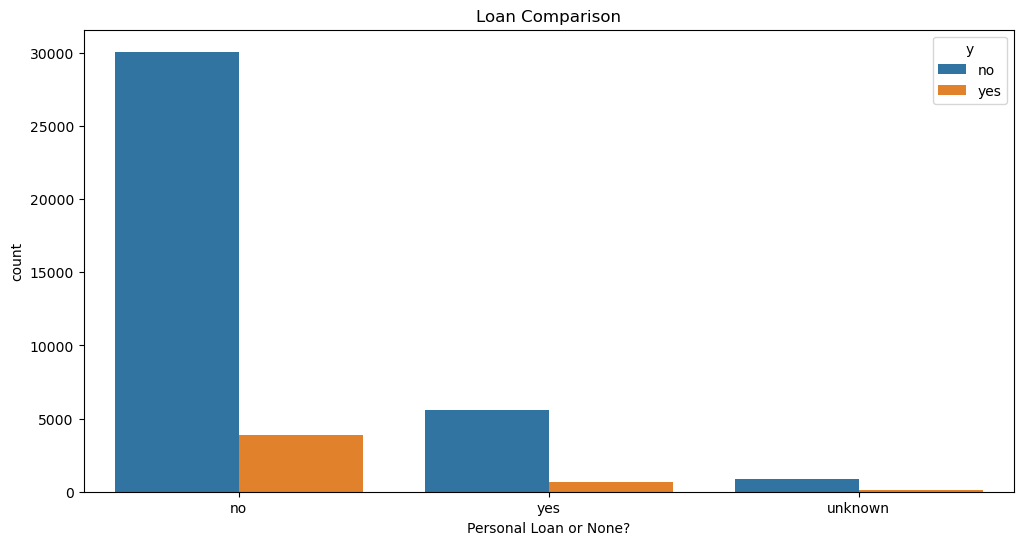

In [24]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df_bank["loan"],hue=df_bank["y"], data=df_bank)
plt.title('Loan Comparison')
plt.xlabel('Personal Loan or None?')
plt.show()


In [25]:

loan = (pd.crosstab(index=df_bank["loan"], columns= df_bank["y"], normalize= "index") *100).round(2)
loan.sort_values('yes', ascending=False)
     

y           no    yes
loan                 
no       88.66  11.34
yes      89.07  10.93
unknown  89.19  10.81

Clients who do not have a personal loan in their bank account has a slightly higher chance of about ~1.4%, in making a term deposit, compared to those who have a personal loan. 'Unknown' clients have a similar rate to those with personal loan

# h. contact

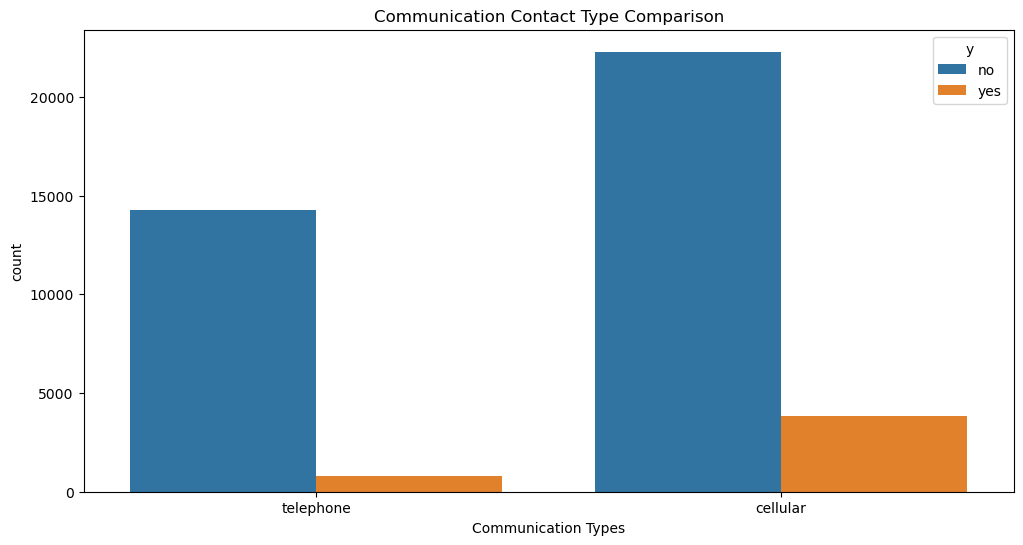

In [26]:

plt.figure(figsize=(12, 6))
sns.countplot(x=df_bank["contact"],hue=df_bank["y"], data=df_bank)
plt.title('Communication Contact Type Comparison')
plt.xlabel('Communication Types')
plt.show()
     

In [27]:

contact_type = (pd.crosstab(index=df_bank["contact"], columns= df_bank["y"], normalize= "index") *100).round(2)
contact_type.sort_values('yes', ascending=False)

y             no    yes
contact                
cellular   85.26  14.74
telephone  94.77   5.23


This is a good indicator for the dependent target variable. According to the data, it shows that there are more clients who decided to take a term deposit upon receiving contact through cellular means (14.74%), as compared to telephone (5.23%), from the marketing team. Knowing this, we can help the bank further segregate their target audience better and determine the best way to communicate with the clients to improve convertion rate.

# i. month

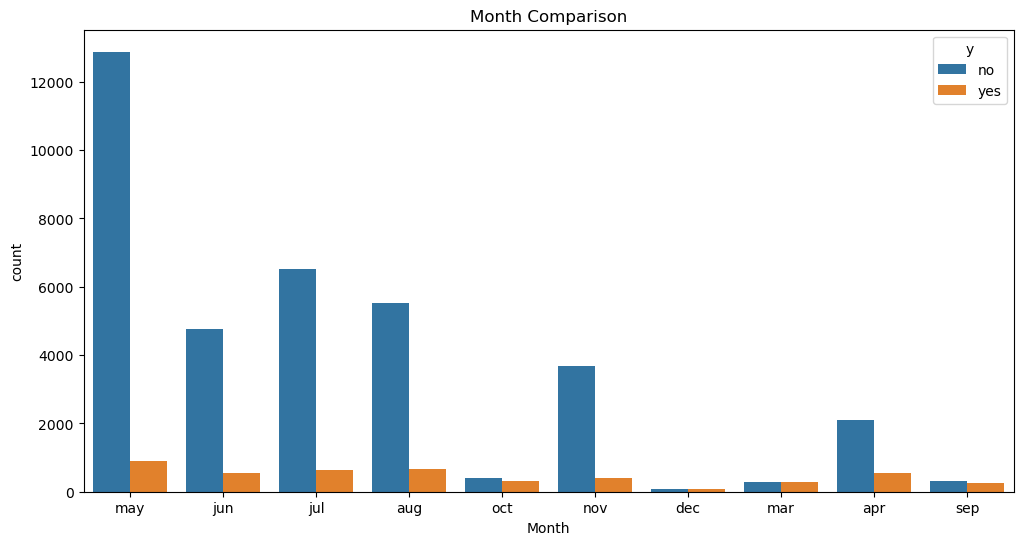

In [28]:

plt.figure(figsize=(12, 6))
sns.countplot(x=df_bank["month"],hue=df_bank["y"], data=df_bank)
plt.title('Month Comparison')
plt.xlabel('Month')
plt.show()


In [29]:

month = (pd.crosstab(index=df_bank["month"], columns= df_bank["y"], normalize= "index") *100).round(2)
month.sort_values(by='month', ascending=False)

y         no    yes
month              
sep    55.09  44.91
oct    56.07  43.93
nov    89.85  10.15
may    93.56   6.44
mar    49.45  50.55
jun    89.49  10.51
jul    90.96   9.04
dec    51.10  48.90
aug    89.39  10.61
apr    79.51  20.49

<BarContainer object of 41176 artists>

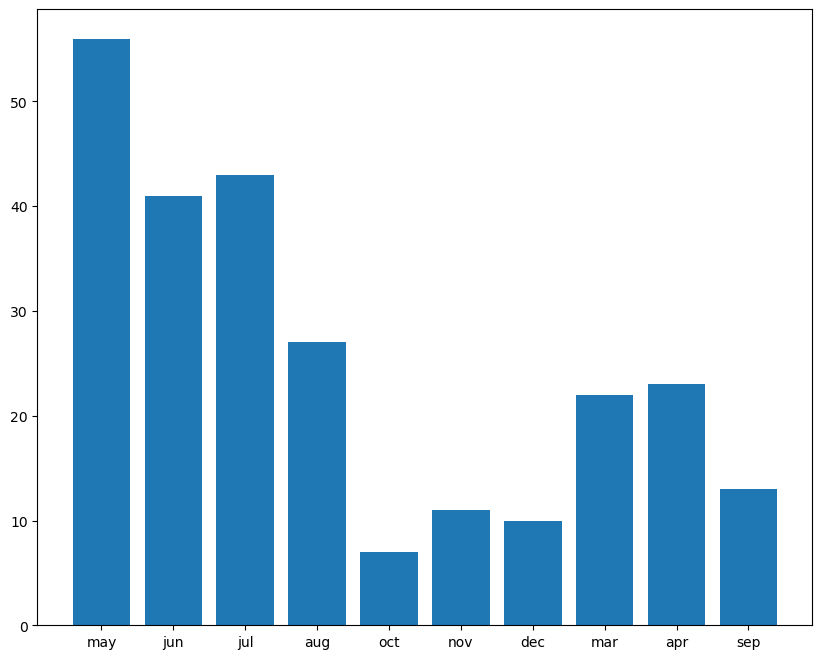

In [30]:

# Month vs Campaign relationship 

plt.figure(figsize=(10, 8))
plt.bar(df_bank['month'], df_bank['campaign'])

From above:

Most of the clients seemed to be contacted around May-July (summer) period.
September until December are quite similar in campaigns carried out, and January-February do not seem to have any observations.
March and April then show signs of increase in campaigns again, possibly to reach May-July frequencies.
Clients seem to more likely make a term deposit in September, October and December.

# j. day_of_week

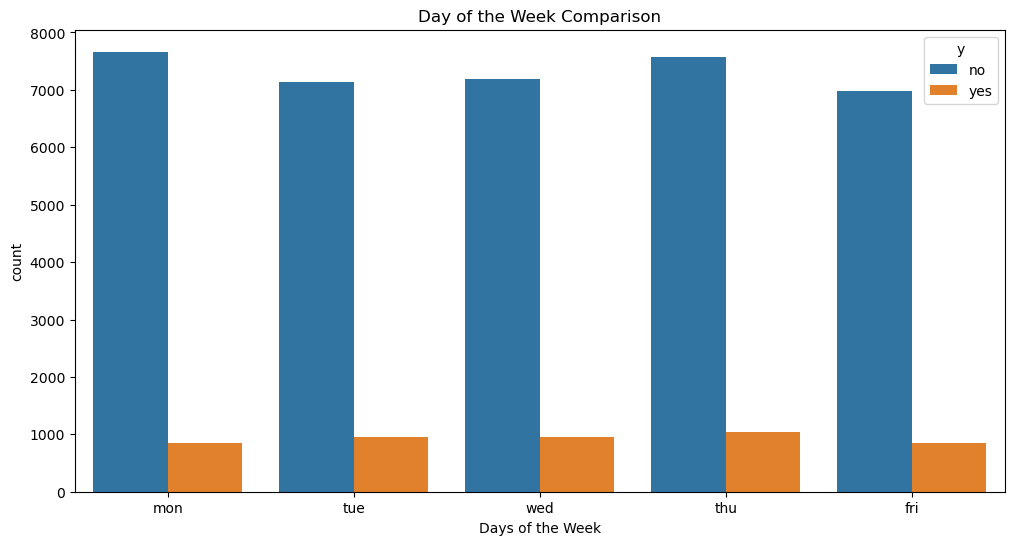

In [31]:

plt.figure(figsize=(12, 6))
sns.countplot(x=df_bank["day_of_week"],hue=df_bank["y"], data=df_bank)
plt.title('Day of the Week Comparison')
plt.xlabel('Days of the Week')
plt.show()

In [32]:
day_week = (pd.crosstab(index=df_bank["day_of_week"], columns= df_bank["y"], normalize= "index") *100).round(2)
day_week.sort_values('yes', ascending=False)
     

y               no    yes
day_of_week              
thu          87.89  12.11
tue          88.21  11.79
wed          88.33  11.67
fri          89.19  10.81
mon          90.05   9.95

# k. duration and campaign

In [33]:

# Campaign vs Duration of call 

import plotly.express as px

px.scatter(df_bank, x="campaign", y="duration", color="y")

Campaign cateogry tells the number of contacts performed during the marketing campaign for the particular client (up until the last contact). Therefore, based on the the graph above:

Most of the customers seem to make a term deposit in the early days of the campaign (inital positive response).
The higher the duration of the call, the more likely it is for the customer(s) to make a term deposit to the bank.
Duration of call decreases as the time period of campaign progresses.
However, the 'duration' attribute will remain excluded in order to achieve a more realistic predictive mode

# m. pdays

In [34]:

df_bank.loc[df_bank.loc[:, 'pdays']!=999, 'pdays'] = 1 #client has been contacted
df_bank.loc[df_bank.loc[:, 'pdays']==999, 'pdays'] = 0 #never contacted

In [35]:
  

df_bank['pdays'].value_counts()

0    39661
1     1515
Name: pdays, dtype: int64

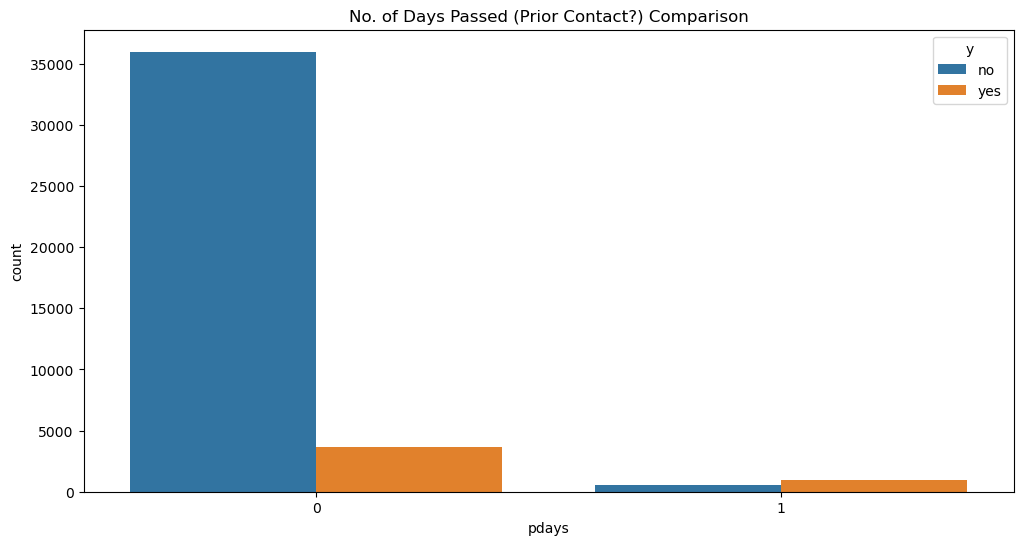

In [36]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df_bank["pdays"],hue=df_bank["y"], data=df_bank)
plt.title('No. of Days Passed (Prior Contact?) Comparison')
plt.show()

In [37]:
pdays = (pd.crosstab(index=df_bank["pdays"], columns= df_bank["y"], normalize= "index") *100).round(2)
pdays.sort_values(by='pdays', ascending=False)

y         no    yes
pdays              
1      36.17  63.83
0      90.74   9.26

The table shows that clients who were previously contacted are 7x more likely to make a term deposit, compared to those who have never been contacted.

# n. previous

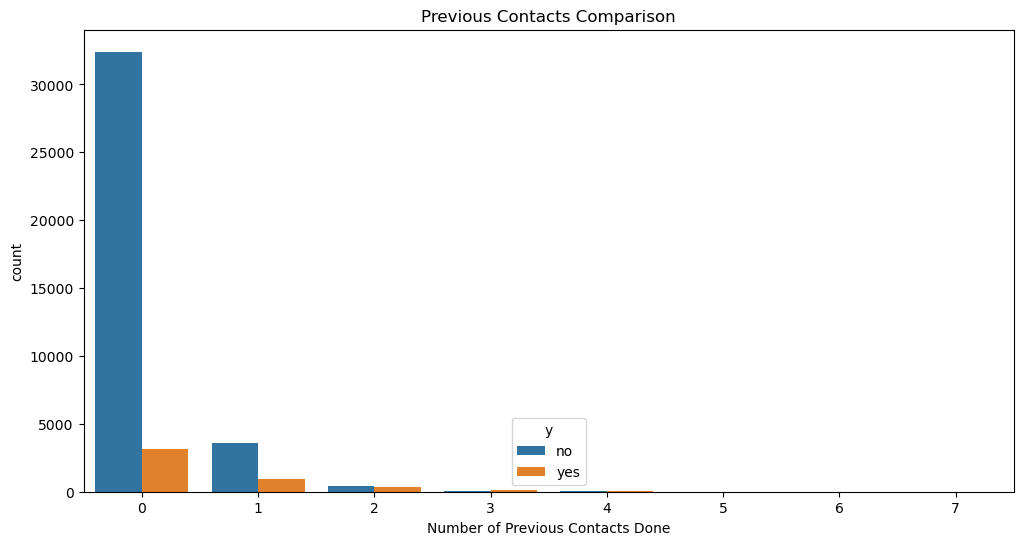

In [38]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df_bank["previous"],hue=df_bank["y"], data=df_bank)
plt.title('Previous Contacts Comparison')
plt.xlabel('Number of Previous Contacts Done')
plt.show()

In [39]:

previous = (pd.crosstab(index=df_bank["previous"], columns= df_bank["y"], normalize= "index") *100).round(2)
previous.sort_values('yes', ascending=False)

y             no    yes
previous               
5          27.78  72.22
6          40.00  60.00
3          40.74  59.26
4          45.71  54.29
2          53.58  46.42
1          78.80  21.20
0          91.17   8.83
7         100.00   0.00

# o. poutcome

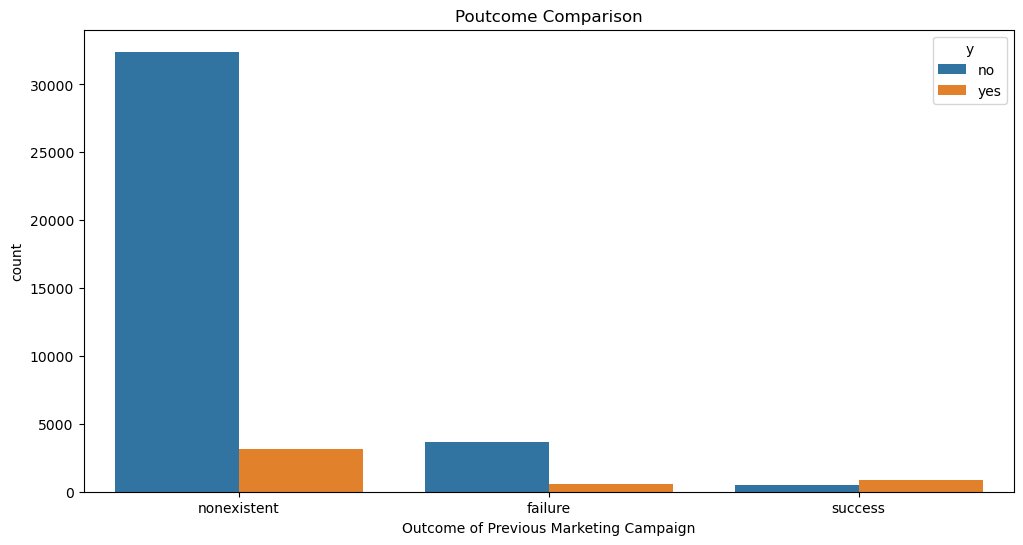

In [40]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df_bank["poutcome"],hue=df_bank["y"], data=df_bank)
plt.title('Poutcome Comparison')
plt.xlabel('Outcome of Previous Marketing Campaign')
plt.show()
     


In [41]:
poutcome = (pd.crosstab(index=df_bank["poutcome"], columns= df_bank["y"], normalize= "index") *100).round(2)
poutcome.sort_values('yes', ascending=False)

y               no    yes
poutcome                 
success      34.89  65.11
failure      85.77  14.23
nonexistent  91.17   8.83

# Socio-Economic Attributes' Distribution


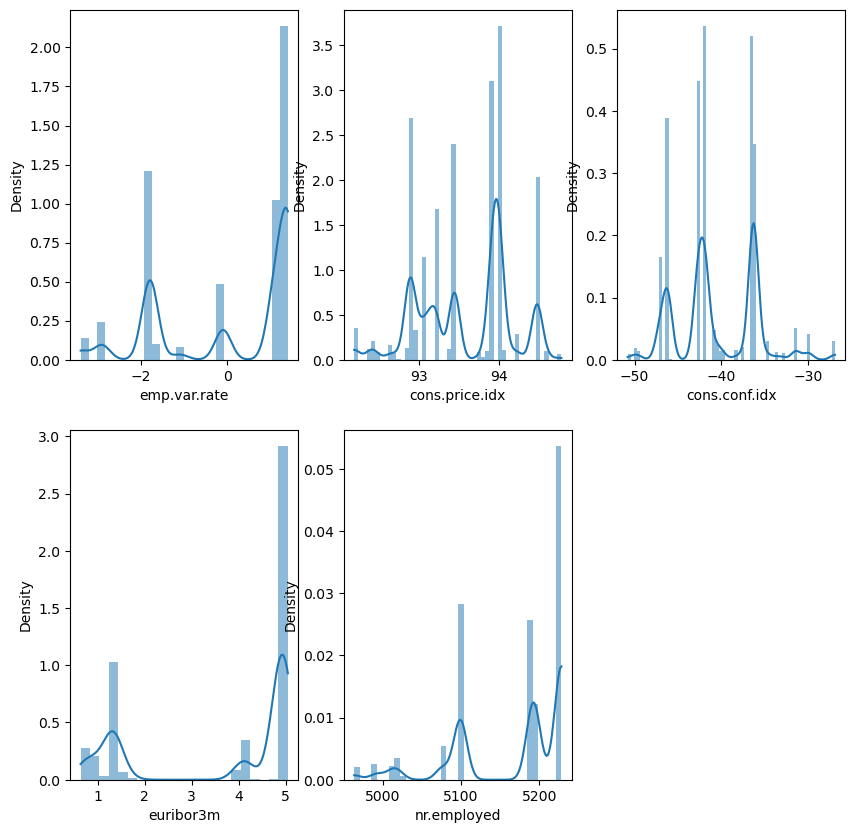

In [42]:
plt.subplot(231)
sns.histplot(df_bank['emp.var.rate'], kde=True, stat="density", linewidth=0)
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(232)
sns.histplot(df_bank['cons.price.idx'], kde=True, stat="density", linewidth=0)
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(233)
sns.histplot(df_bank['cons.conf.idx'], kde=True, stat="density", linewidth=0)
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(234)
sns.histplot(df_bank['euribor3m'], kde=True, stat="density", linewidth=0)
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(235)
sns.histplot(df_bank['nr.employed'], kde=True, stat="density", linewidth=0)
fig = plt.gcf()
fig.set_size_inches(10,10)
     


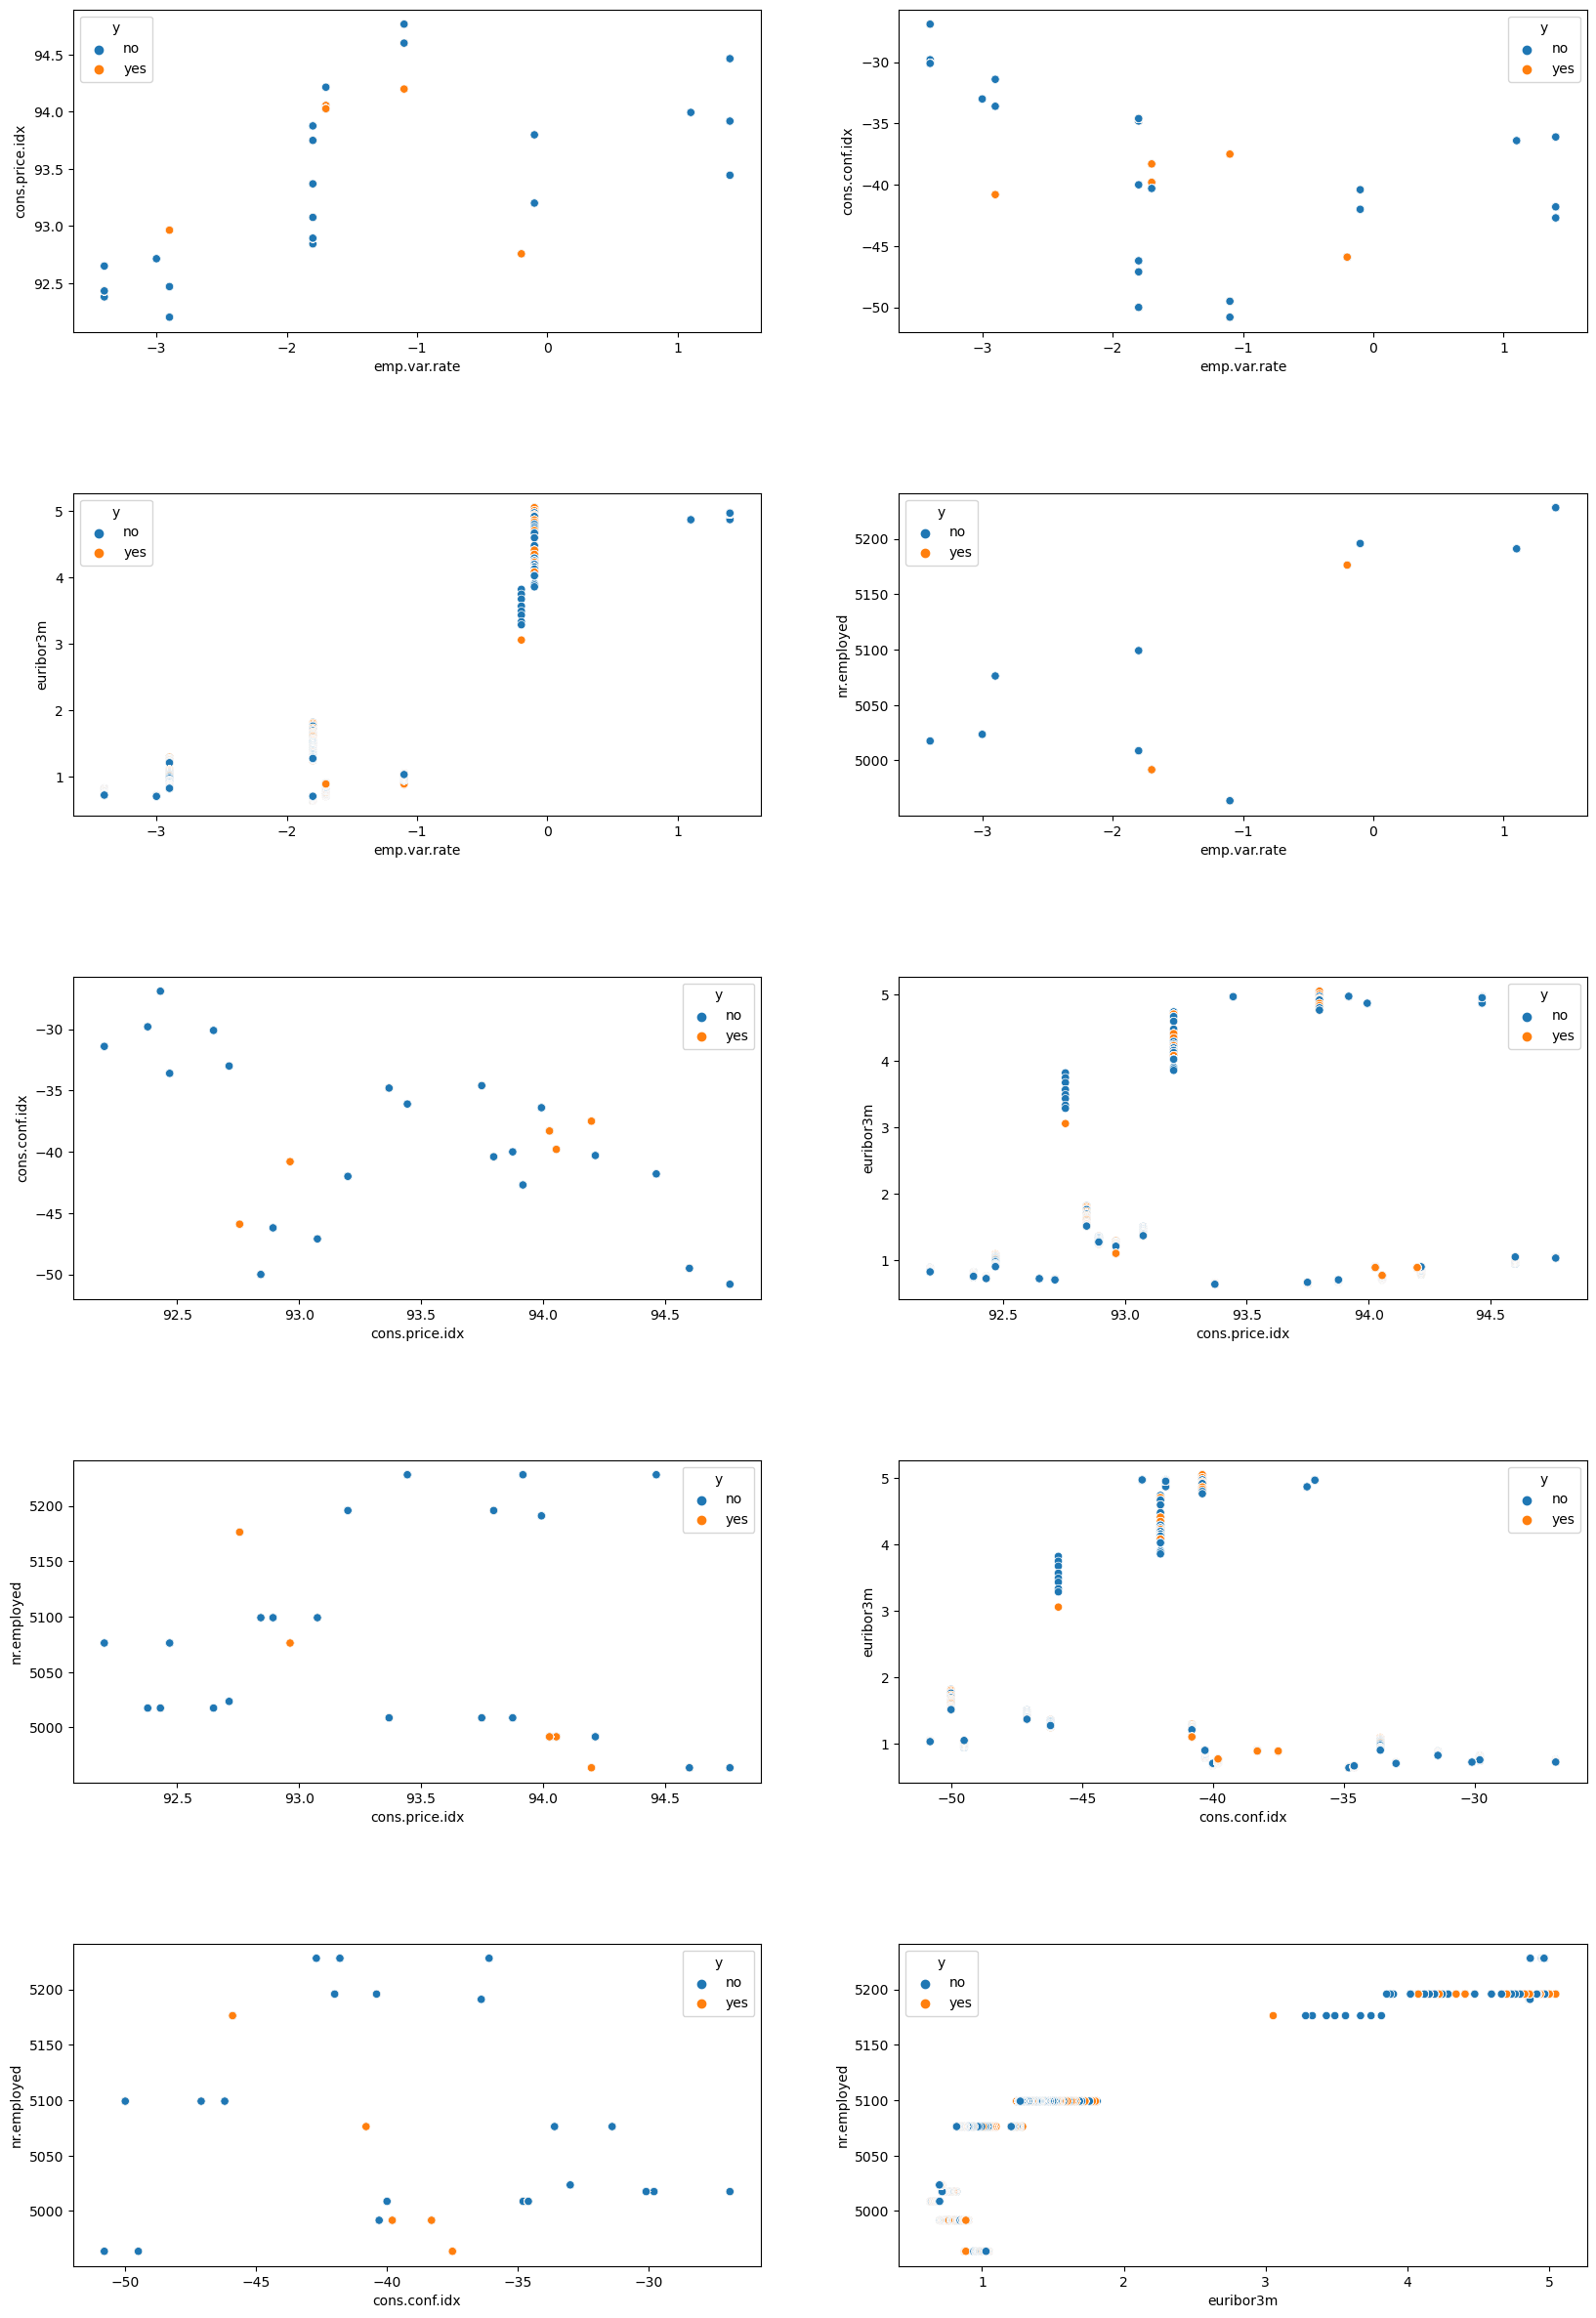

In [43]:
x=['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
y=['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

fig, ax = plt.subplots(5,2, figsize=(20,30))
ax = ax.ravel()
position=0
for i in range(len(x)):
    for j in range(i+1,len(y)):
        sns.scatterplot(x=x[i], y=y[j], data=df_bank, hue='y',ax=ax[position])
        #sns.scatterplot(x=x[i], y=y[j], data=df_bank[df_bank['y']==1], hue='y',ax=ax[position])
        position=position+1
        
plt.subplots_adjust(hspace=0.5)
plt.show()
     


Insights from distribution plot (no comparisons amongst attributes):

High employee variation rate seems to signify that the campaign was made when there are high job demand supply due to (possibly good) economical conditions.
The consumer price index seems relatively high, meaning goods and service prices are relatively good, which is a stimulant for clients to make a deposit by giving the idea of savings.
Consumer confidence index seems pretty low, perhaps due to fluctuating economy.
The 3 months Euribor interest rate is the interest rate at which a selection of European banks lend one another funds denominated in euros whereby the loans have a maturity of 3 months. In this case the interest rates seem relatively high for lending their loans.
Number of employees seem pretty high, which can increase their income index that could be the factor the campaign targetted in order to get employed clients to make a term deposit.
Insight(s) from the scatterplot graphs (comparison made with attributes):

Clients seem inclined to make a deposit when 'cons.price.idx' is lower and 'emp.var.rate' is negative.
When 'nr.employed' is less than 5100, clients tend to make a term deposit. The remaining relationships do not show any evident trend.

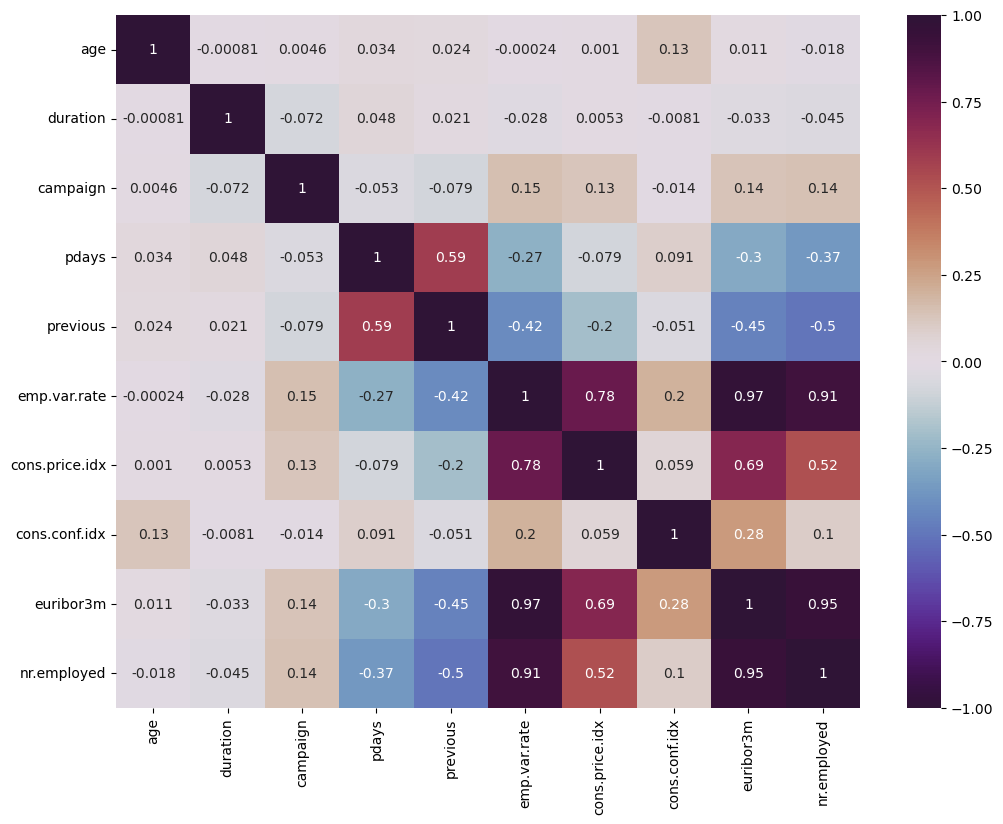

In [44]:
plt.figure(figsize=(12, 9))
corr = df_bank.corr()
sns.heatmap(corr, vmax=1, vmin=-1, center=0, annot=True,cmap= 'twilight_shifted');
     


# Data Preprocessing

# Feature Selection - With Selected Dropped Columns

In [45]:
df_temp = df_bank

In [46]:

df_bank = df_temp
     

In [47]:
df_bank = df_bank.drop(columns=['marital'])
df_bank = df_bank.drop(columns=['education'])
df_bank = df_bank.drop(columns=['housing'])
df_bank = df_bank.drop(columns=['duration'])
df_bank = df_bank.drop(columns=['day_of_week'])
df_bank = df_bank.drop(columns=['loan'])
df_bank = df_bank.drop(columns=['age'])
     


In [48]:

df_bank_feat = df_bank
df_bank_feat.head()

job  default    contact month  campaign  pdays  previous  \
0  housemaid       no  telephone   may         1      0         0   
1   services  unknown  telephone   may         1      0         0   
2   services       no  telephone   may         1      0         0   
3     admin.       no  telephone   may         1      0         0   
4   services       no  telephone   may         1      0         0   

      poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0  nonexistent           1.1          93.994          -36.4      4.857   
1  nonexistent           1.1          93.994          -36.4      4.857   
2  nonexistent           1.1          93.994          -36.4      4.857   
3  nonexistent           1.1          93.994          -36.4      4.857   
4  nonexistent           1.1          93.994          -36.4      4.857   

   nr.employed   y          agegroup  
0       5191.0  no           Elderly  
1       5191.0  no           Elderly  
2       5191.0  no  Middle-age Adult  
3       5191.0  no  Middle-age Adult  
4       5191.0  no           Elderly

In [49]:
# Numerical encoding for categorical columns

# 'month' column encoding
month_dict={'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}
df_bank_feat['month']= df_bank_feat['month'].map(month_dict) 

In [50]:

# binary encode 'y' column to 0 for no and 1 for yes
y_dict={'no': 0,'yes': 1}
df_bank_feat['y']= df_bank_feat['y'].map(y_dict)

In [51]:

df_bank_feat.head()
     

job  default    contact  month  campaign  pdays  previous  \
0  housemaid       no  telephone      5         1      0         0   
1   services  unknown  telephone      5         1      0         0   
2   services       no  telephone      5         1      0         0   
3     admin.       no  telephone      5         1      0         0   
4   services       no  telephone      5         1      0         0   

      poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0  nonexistent           1.1          93.994          -36.4      4.857   
1  nonexistent           1.1          93.994          -36.4      4.857   
2  nonexistent           1.1          93.994          -36.4      4.857   
3  nonexistent           1.1          93.994          -36.4      4.857   
4  nonexistent           1.1          93.994          -36.4      4.857   

   nr.employed  y          agegroup  
0       5191.0  0           Elderly  
1       5191.0  0           Elderly  
2       5191.0  0  Middle-age Adult  
3       5191.0  0  Middle-age Adult  
4       5191.0  0           Elderly

# Split Train and Test Sets

In [52]:

X_drop = df_bank_feat.drop('y',axis=1)
y_drop = df_bank_feat['y']

In [53]:
from sklearn.model_selection import train_test_split
X_drop_train, X_drop_test, y_drop_train, y_drop_test = train_test_split(X_drop, y_drop, random_state=42, test_size=0.20)

print(X_drop_train.shape, X_drop_test.shape, y_drop_train.shape, y_drop_test.shape)
     

(32940, 14) (8236, 14) (32940,) (8236,)


# Random OverSampling

In [54]:
print(f"Before OverSampling, counts of label '1': {sum(y_drop_train == 1)}") 
print(f"Before OverSampling, counts of label '0': {sum(y_drop_train == 0)} \n") 

from imblearn.over_sampling import RandomOverSampler
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy=0.4) 
X_drop_train_over, y_drop_train_over = oversample.fit_resample(X_drop_train, y_drop_train)
  
print(f'After OverSampling, the shape of X_train: {X_drop_train_over.shape}') 
print(f'After OverSampling, the shape of y_train: {y_drop_train_over.shape} \n') 
  
print(f"After OverSampling, counts of label '1': {sum(y_drop_train_over == 1)}") 
print(f"After OverSampling, counts of label '0': {sum(y_drop_train_over == 0)}") 

Before OverSampling, counts of label '1': 3668
Before OverSampling, counts of label '0': 29272 

After OverSampling, the shape of X_train: (40980, 14)
After OverSampling, the shape of y_train: (40980,) 

After OverSampling, counts of label '1': 11708
After OverSampling, counts of label '0': 29272


# Classification Model

For our classification model(s), we have chosen to use:

Logistic Regression
K Neighbours
Random Forest
Gradient Boosting (XGBoost)
Logistic Regression is more easily interpretable in terms of feature importance for data analysis. It is relatively easier to show which feature contributes the most to the model.

Random Forest is used since it shows better accuracy on the model performance. The model performance on prediction is prioritised, however, it is not as easily interpretable due to the complex output nature. It is a black box in terms of interpretable explanation, however, since we want to prioritise model performance, this model is our go-to for this particular case.

# Pipeline

In [55]:
# group into numerical, categorical, and binary columns for encoding
num_cols = ['month', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'euribor3m', 'nr.employed', 'cons.conf.idx']
ctg_cols = ['default', 'contact', 'poutcome', 'agegroup']
binary_cols = ['job']
     


In [56]:
!pip install  category_encoders

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [57]:

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import category_encoders as ce

scaler = StandardScaler()
onencoder = OneHotEncoder()
binaryencode = ce.BinaryEncoder()

# encode the columns
col_transformer = ColumnTransformer([
    ('scaler', StandardScaler(), num_cols),
    ('onencoder', OneHotEncoder(), ctg_cols),
    ('binaryencode', ce.BinaryEncoder(), binary_cols)
])


# Create pipelines for each model classifiers
# Logistic Regression
pipe_lr = Pipeline([
    ('col_transformer', col_transformer),
    ('log_reg', LogisticRegression(solver='liblinear'))
])
# KNN 
pipe_knn = Pipeline([
    ('col_transformer', col_transformer),
    ('knn', KNeighborsClassifier())
])

# Random Forest
pipe_rf = Pipeline([
    ('col_transformer', col_transformer),
    ('random_f', RandomForestClassifier())
])

# XGBoost Classifier
pipe_xgb = Pipeline([
    ('col_transformer', col_transformer),
    ('xgb', GradientBoostingClassifier())
])

In [58]:

pipe_lr.fit(X_drop_train_over, y_drop_train_over)

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['month', 'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'euribor3m', 'nr.employed',
                                                   'cons.conf.idx']),
                                                 ('onencoder', OneHotEncoder(),
                                                  ['default', 'contact',
                                                   'poutcome', 'agegroup']),
                                                 ('binaryencode',
                                                  BinaryEncoder(), ['job'])])),
                ('log_reg', LogisticRegression(solver='liblinear'))])

In [59]:
pipe_knn.fit(X_drop_train_over, y_drop_train_over)

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['month', 'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'euribor3m', 'nr.employed',
                                                   'cons.conf.idx']),
                                                 ('onencoder', OneHotEncoder(),
                                                  ['default', 'contact',
                                                   'poutcome', 'agegroup']),
                                                 ('binaryencode',
                                                  BinaryEncoder(), ['job'])])),
                ('knn', KNeighborsClassifier())])

In [60]:

pipe_rf.fit(X_drop_train_over, y_drop_train_over)

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['month', 'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'euribor3m', 'nr.employed',
                                                   'cons.conf.idx']),
                                                 ('onencoder', OneHotEncoder(),
                                                  ['default', 'contact',
                                                   'poutcome', 'agegroup']),
                                                 ('binaryencode',
                                                  BinaryEncoder(), ['job'])])),
                ('random_f', RandomForestClassifier())])

In [61]:
pipe_xgb.fit(X_drop_train_over, y_drop_train_over)

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['month', 'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'euribor3m', 'nr.employed',
                                                   'cons.conf.idx']),
                                                 ('onencoder', OneHotEncoder(),
                                                  ['default', 'contact',
                                                   'poutcome', 'agegroup']),
                                                 ('binaryencode',
                                                  BinaryEncoder(), ['job'])])),
                ('xgb', GradientBoostingClassifier())])

# Cross Validation
Following the pipeline construction, we used cross validation to find out which algorithm will be the best for our prediction model by checking the model accuracy at once. Then, we will proceed with the model that exhibits the highest accuracy amongst the rest.

In [ ]:
from sklearn.model_selection import cross_validate

models = [pipe_lr, pipe_knn, pipe_rf, pipe_xgb]

# prepare CV result summary table
df_results = pd.DataFrame()

for pipeline_ in models:
    current_step_name = list(pipeline_.named_steps.keys())[1]
    cv_scores = cross_validate(pipeline_, X_drop_train_over, y_drop_train_over, cv=15, scoring=('accuracy',
                                                                           'precision',
                                                                           'recall', 'f1'), 
                               return_train_score=True)
    df_results = df_results.append({
        'algorithm': pipeline_.named_steps[current_step_name].__class__.__name__,
        'Accuracy (train)': cv_scores['train_accuracy'].mean(),
        'Accuracy (val)': cv_scores['test_accuracy'].mean(),
        'Precision (train)': cv_scores['train_precision'].mean(),
        'Precision (val)': cv_scores['test_precision'].mean(),
        'Recall (train)': cv_scores['train_recall'].mean(),
        'Recall (val)': cv_scores['test_recall'].mean(),
        'F1 (train)': cv_scores['train_f1'].mean(),
        'F1 (val)': cv_scores['test_f1'].mean(),
    }, ignore_index=True)
    
df_results

C:\Users\Cwc\AppData\Local\Temp\ipykernel_13104\2956337589.py:14: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of

In [ ]:
best_model_drop = df_results.loc[[2]]
best_model_drop['algorithm']= "RandomForestClassifier_drop"
best_model_drop


# Feature Engineering - Without Dropped Columns

In [ ]:
df_bank=df_temp
     
df_bank

In [ ]:
# 'duration' column is dropped to achieve a more realistic model
# 'age' column is also dropped since a new column 'agegroup' is made
df_bank_feat = df_bank.drop(columns=['duration'])
df_bank_feat = df_bank_feat.drop(columns=['age'])

In [ ]:
month_dict={'may':5,'jul':7,'aug':8,'jun':6,'nov':11,'apr':4,'oct':10,'sep':9,'mar':3,'dec':12}
df_bank_feat['month']= df_bank_feat['month'].map(month_dict)

In [ ]:
# binary encode 'y' column to 0 for no and 1 for yes
y_dict={'no': 0,'yes': 1}
df_bank_feat['y']= df_bank_feat['y'].map(y_dict)

# Split Train and Test Sets

In [ ]:

X = df_bank_feat.drop('y',axis=1)
y = df_bank_feat['y']

In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.20)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
     

# Random OverSampling

In [ ]:
print(f"Before OverSampling, counts of label '1': {sum(y_train == 1)}") 
print(f"Before OverSampling, counts of label '0': {sum(y_train == 0)} \n") 

from imblearn.over_sampling import RandomOverSampler
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy=0.4) 
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)
  
print('After OverSampling, the shape of X_train: {}'.format(X_train_over.shape)) 
print('After OverSampling, the shape of y_train: {} \n'.format(y_train_over.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_over == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_over == 0))) 
     

# Pipeline

In [ ]:

df_bank_feat.columns
     

In [ ]:
# group into numerical, categorical, and binary columns for encoding
num_cols = ['month', 'campaign', 'pdays', 'previous', 'emp.var.rate','cons.conf.idx', 'cons.price.idx', 'euribor3m', 'nr.employed']
ctg_cols = ['marital','education','housing', 'loan', 'default', 'contact','day_of_week', 'poutcome', 'agegroup']
binary_cols = ['job']
     

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import category_encoders as ce

# Define the transformers
scaler = StandardScaler()
onencoder = OneHotEncoder()
binaryencode = ce.BinaryEncoder()

# Encode the columns
col_transformer = ColumnTransformer([
    ('scaler', StandardScaler(), num_cols),
    ('onencoder', OneHotEncoder(), ctg_cols),
    ('binaryencode', ce.BinaryEncoder(), binary_cols)
])

# Create pipelines for each model classifier
# Logistic Regression
pipe_lr = Pipeline([
    ('col_transformer', col_transformer),
    ('log_reg', LogisticRegression(solver='liblinear'))
])

# KNN 
pipe_knn = Pipeline([
    ('col_transformer', col_transformer),
    ('knn', KNeighborsClassifier())
])

# Random Forest
pipe_rf = Pipeline([
    ('col_transformer', col_transformer),
    ('random_f', RandomForestClassifier())
])

# XGBoost Classifier
pipe_xgb = Pipeline([
    ('col_transformer', col_transformer),
    ('xgb', GradientBoostingClassifier())
])

# Fit oversampled training sets into each model's pipeline
pipe_lr.fit(X_train_over, y_train_over)
pipe_knn.fit(X_train_over, y_train_over)
pipe_xgb.fit(X_train_over, y_train_over)


In [ ]:
# Fit oversampled training sets into each model's pipeline
pipe_lr.fit(X_train_over, y_train_over)

In [ ]:

pipe_knn.fit(X_train_over, y_train_over)

In [ ]:

pipe_xgb.fit(X_train_over, y_train_over)

# Cross Validation

In [ ]:
from sklearn.model_selection import cross_validate
import pandas as pd

models = [pipe_lr, pipe_knn, pipe_rf, pipe_xgb]

results = []
for pipeline_ in models:
    current_step_name = list(pipeline_.named_steps.keys())[1] 
    cv_scores = cross_validate(pipeline_, X_train_over, y_train_over,
                               cv=15, scoring=('accuracy', 'precision','recall', 'f1'),  
                               return_train_score=True)
    
    results.append({
        'algorithm': pipeline_.named_steps[current_step_name].__class__.__name__,
        'Accuracy (train)': cv_scores['train_accuracy'].mean(), 
        'Accuracy (val)': cv_scores['test_accuracy'].mean(),
        'Precision (train)': cv_scores['train_precision'].mean(),
        'Precision (val)': cv_scores['test_precision'].mean(),
        'Recall (train)': cv_scores['train_recall'].mean(),
        'Recall (val)': cv_scores['test_recall'].mean(), 
        'F1 (train)': cv_scores['train_f1'].mean(),
        'F1 (val)': cv_scores['test_f1'].mean(),
    })
    
df_results_second = pd.concat(results, ignore_index=True)

In [ ]:
best_model_nodrop = df_results_second.loc[[2]]
best_model_nodrop['algorithm']= "RandomForestClassifier_nodrop"
best_model_nodrop
     

# Final Model Selection

In [ ]:
best_model = pd.concat([best_model_drop,best_model_nodrop])
best_model

# Hyperparameter Tuning for Random Forest Model

In [ ]:
# See parameters used for initial pipeline without tuning 
pipe_rf.get_params()
     

In [ ]:
# Tuning parameter for RF ( tuning parameters are choosen based on best parameters of RandomizedSearchCV)

from sklearn.model_selection import RandomizedSearchCV, cross_val_score

weights = np.arange(0.1,0.9,0.1)
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 5)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(1, 45, num = 3)]
min_samples_split = [5, 10]
pm_rf = {
    'random_f__n_estimators': n_estimators,
    'random_f__max_depth': max_depth,
    'random_f__max_features': max_features,
    'random_f__min_samples_split' : min_samples_split,
#     'random_f__min_samples_leaf': np.arange(1,200,1),
    'random_f__class_weight': [{0:x, 1:1.0-x} for x in weights],
#     "random_f__random_state" : [42],
}
                    
tuning_rf = RandomizedSearchCV(pipe_rf, pm_rf, n_iter=10, cv=15, 
                               verbose = 2, n_jobs=-1, scoring='recall', 
                               random_state= 42)

tuning_rf.fit(X_train_over, y_train_over)
print('Best Parameter for Random Forest', tuning_rf.best_params_)
print(tuning_rf.best_score_)

# Evaluation


In [ ]:
# Evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, average_precision_score, precision_recall_curve 
from sklearn.metrics import recall_score, roc_curve, roc_auc_score, precision_recall_curve, auc, plot_confusion_matrix

# Tuned random forest pipeline

pipe_rf_tuned = Pipeline([
    ('col_transformer', col_transformer),
    ('random_f', RandomForestClassifier(n_estimators = 505, min_samples_split = 5, 
                                        min_samples_leaf = 87, max_features ='sqrt', 
                                        max_depth= 45, class_weight={0:0.30000000000000004, 1: 0.7}))
])

pipe_rf_tuned.fit(X_train_over, y_train_over)
random_pred = pipe_rf_tuned.predict(X_test)

plot_confusion_matrix(pipe_rf_tuned, X_test, y_test)
# confusion_matrix = confusion_matrix(y_test, random_pred)
# print("Confusion Matrix:\n",confusion_matrix)
print(classification_report(y_test, random_pred))

# ROC - AUC Score

In [ ]:
rfc_roc_auc = roc_auc_score(y_test, pipe_rf_tuned.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, pipe_rf_tuned.predict_proba(X_test)[:, 1])

plt.figure()

plt.plot(fpr, tpr, 'b', label = 'RFC AUC = %0.2f' % rfc_roc_auc)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('RFC ROC Curve')
plt.show()
     


# Feature Importance

In [ ]:

bank_columns =[]
bank_columns.append(num_cols+list(pipe_rf.named_steps['col_transformer'].transformers_[1][1].get_feature_names(ctg_cols))+pipe_rf.named_steps['col_transformer'].transformers_[2][1].get_feature_names())
bank_columns[0]

In [ ]:
feat_importances = pd.Series(pipe_rf.steps[1][1].feature_importances_, index=bank_columns[0])
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
feat_importances = pd.Series(pipe_rf.steps[1][1].feature_importances_, index=bank_columns[0])
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
feat_importances = pd.Series(pipe_rf.steps[1][1].feature_importances_, index=bank_columns[0])
feat_importances.nlargest(20).plot(kind='barh')
plt.show()
         